In [4]:
import scanpy as sc
from pathlib import Path
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from itertools import combinations, pairwise
import pandas as pd

In [5]:
sc.settings.set_figure_params(dpi=100, facecolor="white")

In [6]:
def replace_underscores(series):
    series = series.str.replace(r'[_-]', '\n', regex=True)

    return series

In [7]:
data_file = Path('../data/endometrium_filtered.h5ad')
data = sc.read_h5ad(data_file)

menstrual_cycle= ['proliferative', 'early-secretory', 'early-mid-secretory', 'mid-secretory', 'late-secretory']
spaced_menstrual_cycle= ['proliferative', 'early\nsecretory', 'early\nmid\nsecretory', 'mid\nsecretory', 'late\nsecretory']

data.obs['Stage'] = pd.Categorical(data.obs['Stage'],
                                   categories=menstrual_cycle,
                                   ordered=True)

data.obs['Stage spaced'] = replace_underscores(data.obs['Stage'])
data.obs['Stage spaced'] = pd.Categorical(data.obs['Stage spaced'],
                                          categories=spaced_menstrual_cycle,
                                          ordered=True)

# TENTs' counts

In [8]:
tents = ["PAPD5", "PAPD7", "FAM46A", "FAM46B", "FAM46C"]

tent_map = {'TENT4B':'PAPD5',
            'TENT4A':'PAPD7',
            'TENT5A':'FAM46A',
            'TENT5B':'FAM46B',
            'TENT5C':'FAM46C'}

## TENTs in endometrium by broad cell type

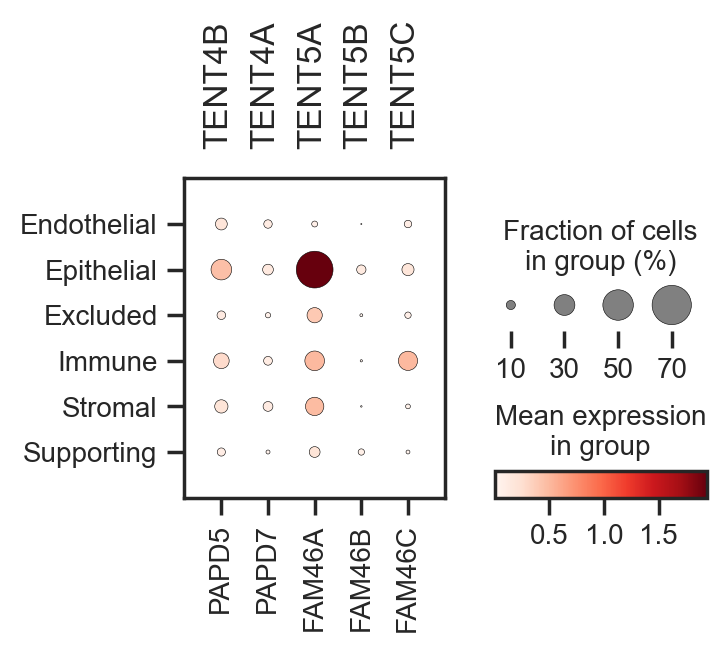

In [32]:
sc.pl.dotplot(data,
              groupby='Broad cell type',
              var_names=tent_map,
              save='counts_tent_cell_type.png')

In [10]:
tent_df_type = pd.DataFrame({'TENT5A': data.obs_vector('FAM46A'),
                             'Broad cell type': data.obs['Broad cell type'].values})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stromal vs. Supporting: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.290e-257 U_stat=3.450e+08
Immune vs. Stromal: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.703e-03 U_stat=5.738e+07
Endothelial vs. Epithelial: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=5.072e+07
Epithelial vs. Excluded: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.853e-265 U_stat=4.342e+07
Excluded vs. Immune: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.076e-09 U_stat=2.424e+06
Excluded vs. Stromal: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.945e-07 U_stat=3.028e+07
Immune vs. Supporting: Mann-Wh

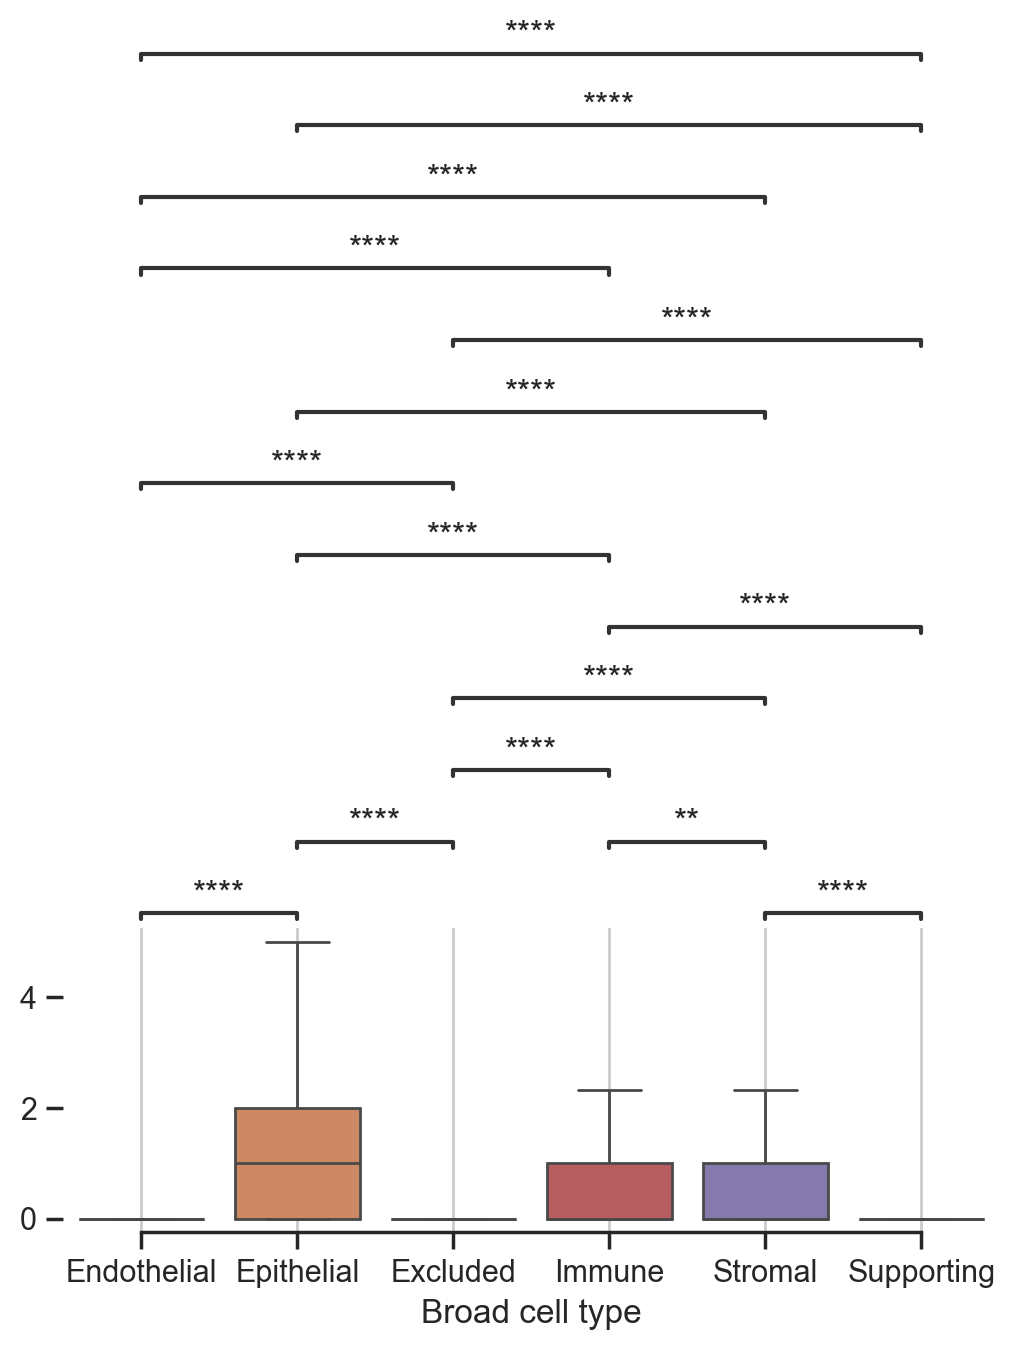

In [11]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(6, 2))

sns.boxplot(x='Broad cell type',
            y='TENT5A',
            hue='Broad cell type',
            showfliers=False,
            data=tent_df_type,
            legend=False)

pairs = list(combinations(tent_df_type['Broad cell type'].unique(), 2))

annotator = Annotator(ax,
                      pairs,
                      data=tent_df_type,
                      x='Broad cell type',
                      y='TENT5A',
                      orientation='horizontal')

annotator.configure(test='Mann-Whitney',
                    text_format='star',
                    loc='outside',
                    comparisons_correction='fdr_bh',
                    line_offset=0,
                    line_offset_to_group=0)

annotator.apply_and_annotate()

ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)

## TENTs in endometrium by cell type

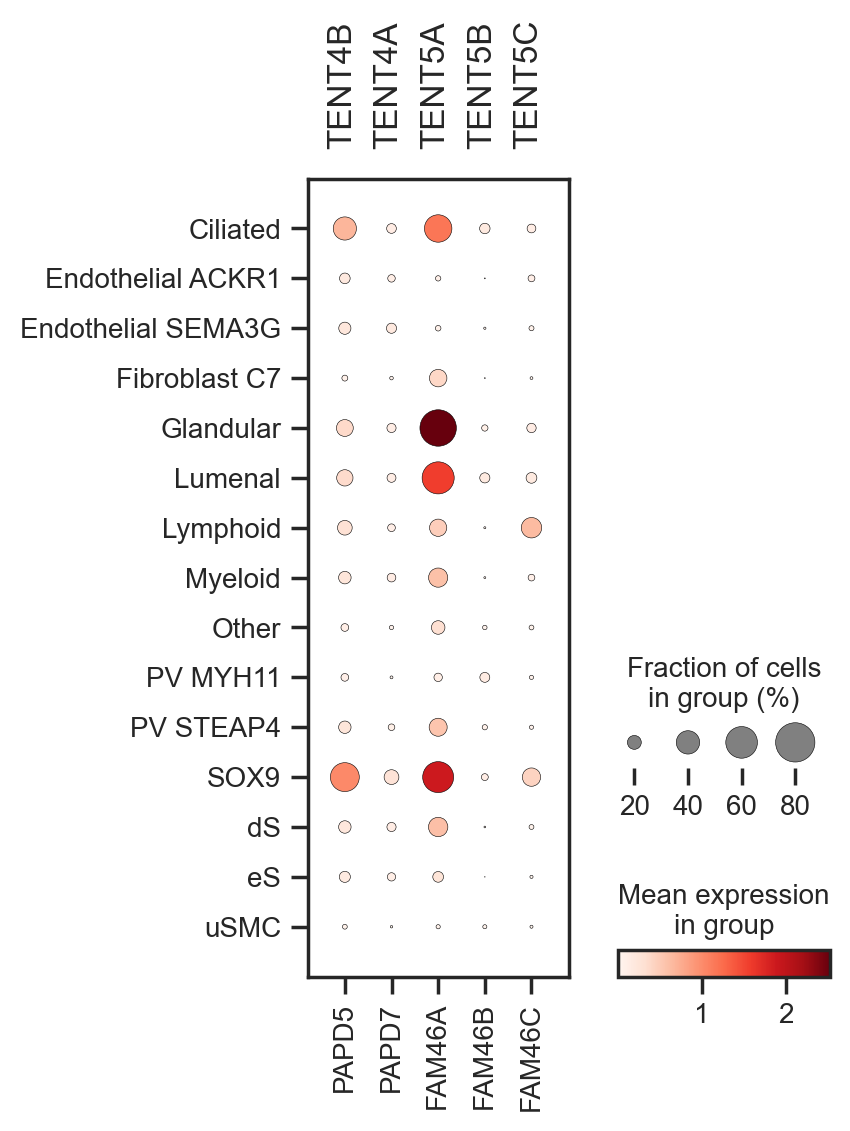

In [12]:
sc.pl.dotplot(data,
              groupby='Cell type',
              var_names=tent_map)

## TENTs in endometrium by menstrual cycle stage

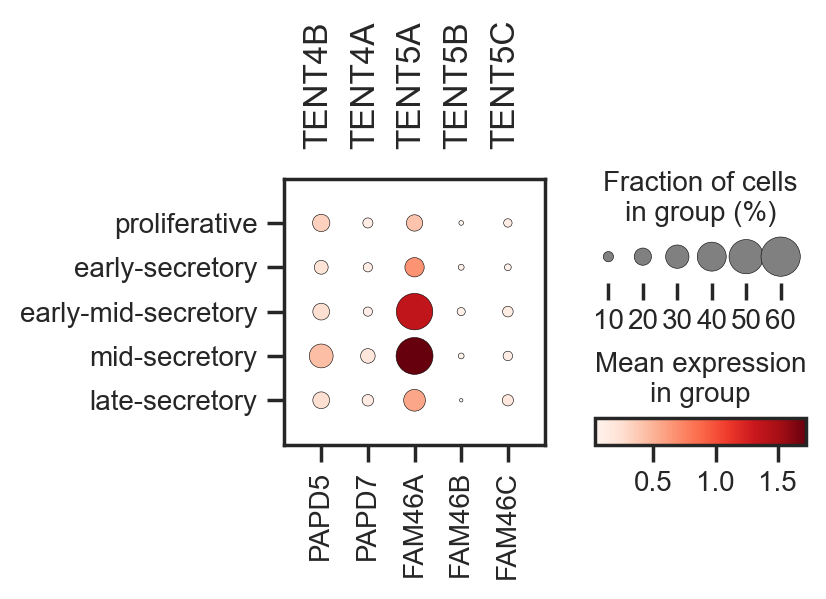

In [57]:
sc.pl.dotplot(data,
              var_names=tent_map, groupby='Stage',
              categories_order=menstrual_cycle,
              save='counts_tent_stage.png')

Kruskal-Wallis

In [14]:
to_compare = []

for condition in menstrual_cycle:
    expr = data[data.obs['Stage'] == condition].obs_vector('FAM46A')
    to_compare.append(expr)

stat, p = stats.kruskal(*to_compare)
print(p)

0.0


In [15]:
tent_df = pd.DataFrame({'TENT5A': data.obs_vector('FAM46A'),
                        'Stage spaced': data.obs['Stage spaced'].values,
                        'Binary Stage': data.obs['Binary Stage'].values})

Based on a [Seaborn example](https://seaborn.pydata.org/examples/horizontal_boxplot.html).

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

proliferative vs. early
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.376e-45 U_stat=2.968e+08
early
secretory vs. early
mid
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=2.633e+08
early
mid
secretory vs. mid
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.247e-16 U_stat=1.304e+08
mid
secretory vs. late
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:0.000e+00 U_stat=5.944e+07


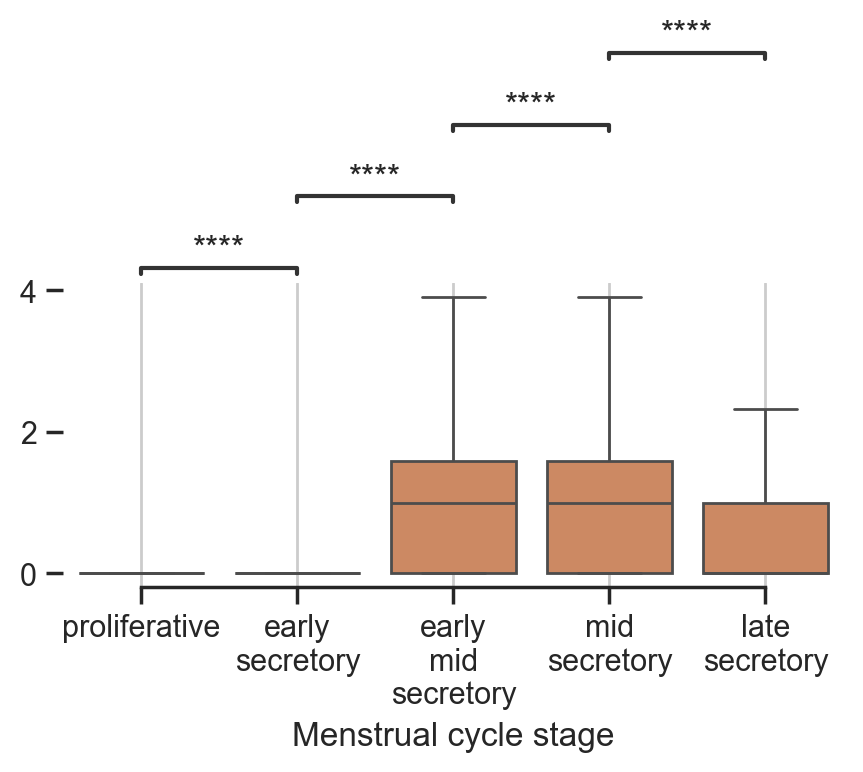

In [59]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(5, 2))

sns.boxplot(x='Stage spaced',
            y='TENT5A',
            hue='Binary Stage',
            showfliers=False,
            data=tent_df,
            legend=False)

pairs = list(pairwise(spaced_menstrual_cycle))

annotator = Annotator(ax,
                      pairs,
                      data=tent_df,
                      y='TENT5A',
                      x='Stage spaced',
                      orientation='horizontal')

annotator.configure(test='Mann-Whitney',
                    text_format='star',
                    loc='outside',
                    comparisons_correction='fdr_bh',
                    line_offset=0,
                    line_offset_to_group=0)

annotator.apply_and_annotate()

plt.xlabel('Menstrual cycle stage')
ax.xaxis.grid(True)
ax.set(ylabel='')

sns.despine(trim=True, left=True)
fig.savefig('figures/endometrium_cycle_box.png',
            dpi=300,
            bbox_inches='tight')

The group sizes are very big, so any small difference is significant.

# Epithelium
Zoom in at epithelial cells as they show the highest expression of TENTs.

In [ ]:
epithelial = data[data.obs['Broad cell type'] == 'Epithelial']

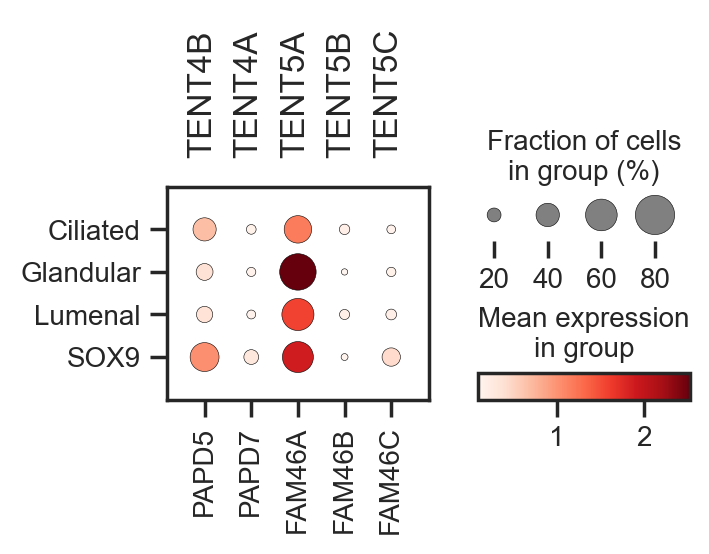

In [50]:
sc.pl.dotplot(epithelial,
              groupby='Cell type',
              var_names=tent_map,
              save='epithelium_counts_tent_cell_type.png')

In [35]:
epi_tent_df_type = pd.DataFrame({'TENT5A': epithelial.obs_vector('FAM46A'),
                                 'Cell type': epithelial.obs['Cell type'].values})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ciliated vs. Glandular: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.047e-177 U_stat=1.394e+07
Glandular vs. Lumenal: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.371e-192 U_stat=1.106e+08
Glandular vs. SOX9: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.634e-64 U_stat=2.787e+07
Ciliated vs. Lumenal: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.547e-33 U_stat=1.933e+07
Ciliated vs. SOX9: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.065e-23 U_stat=4.964e+06


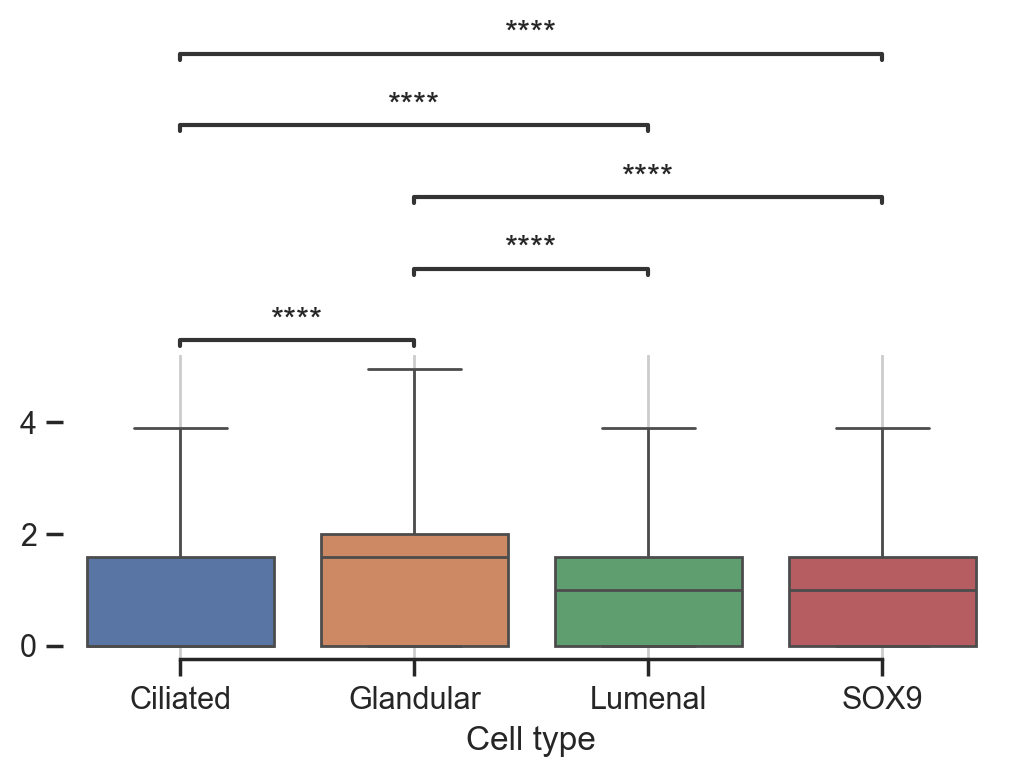

In [38]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(6, 2))

sns.boxplot(x='Cell type',
            y='TENT5A',
            hue='Cell type',
            showfliers=False,
            data=epi_tent_df_type,
            legend=False)

pairs = list(combinations(epi_tent_df_type['Cell type'].unique(), 2))

annotator = Annotator(ax,
                      pairs,
                      data=epi_tent_df_type,
                      x='Cell type',
                      y='TENT5A',
                      orientation='horizontal')

annotator.configure(test='Mann-Whitney',
                    text_format='star',
                    loc='outside',
                    comparisons_correction='fdr_bh',
                    hide_non_significant=True,
                    line_offset=0,
                    line_offset_to_group=0)

annotator.apply_and_annotate()

ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)

TENT5A and TENT5B are expressed across all subtypes of epithelial cells at similar levels.

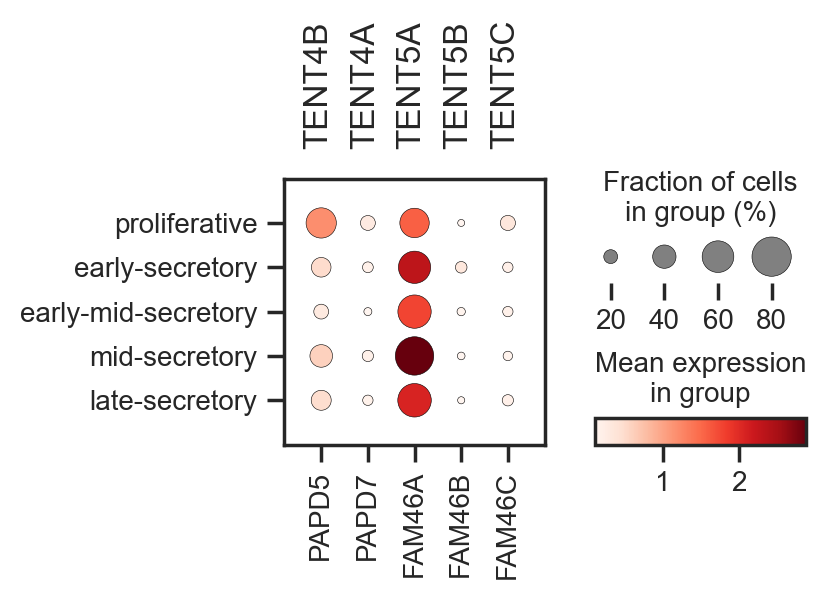

In [19]:
sc.pl.dotplot(epithelial,
              var_names=tent_map, groupby='Stage',
              categories_order=menstrual_cycle,
              save='counts_tent_stage.png')

TENT5a expressed among all phases at the similar level. Hard to interpret without zooming in at certain epithelial subtypes.

## Ciliated cells

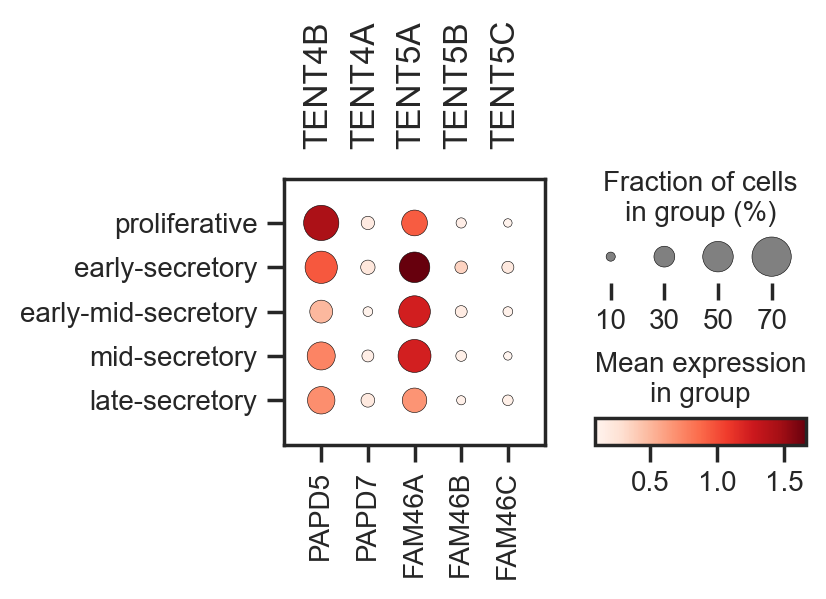

In [20]:
ciliated = epithelial[epithelial.obs['Cell type'] == 'Ciliated']
sc.pl.dotplot(ciliated,
              var_names=tent_map, groupby='Stage',
              categories_order=menstrual_cycle)

No interesting pattern.

## Glandular cells

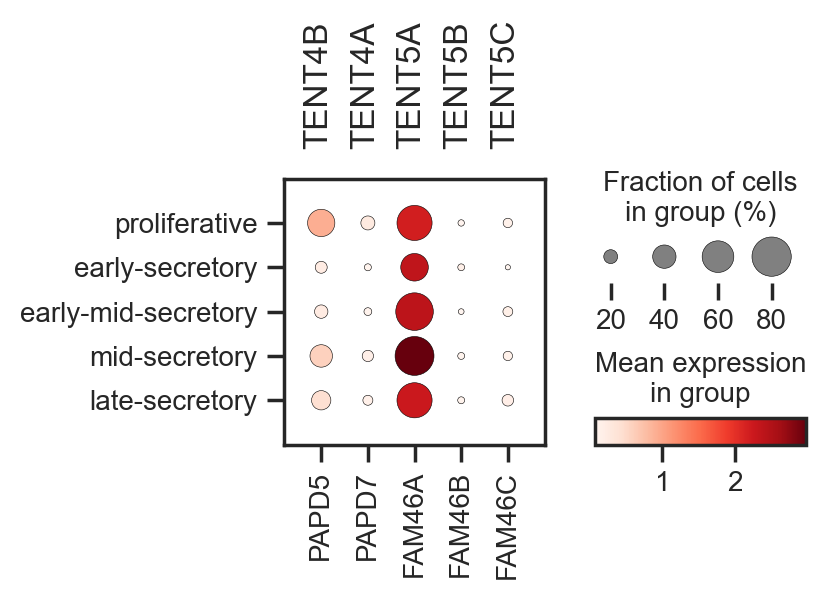

In [44]:
glandular = epithelial[epithelial.obs['Cell type'] == 'Glandular']
sc.pl.dotplot(glandular,
              var_names=tent_map, groupby='Stage',
              categories_order=menstrual_cycle,
              save='_glandular.png')

Some cycle-reated pattern in TENTB. Maybe worth considering.

In [22]:
glandular_to_compare = []

for condition in menstrual_cycle:
    expr = glandular[glandular.obs['Stage'] == condition].obs_vector('FAM46A')
    glandular_to_compare.append(expr)

stat, p = stats.kruskal(*glandular_to_compare)
print(p)

1.201448077203474e-84


In [23]:
glandular_tent_df = pd.DataFrame({'TENT5A': glandular.obs_vector('FAM46A'),
                                  'Stage spaced': glandular.obs['Stage spaced'].values,
                                  'Binary Stage': glandular.obs['Binary Stage'].values})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

proliferative vs. early
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.596e-11 U_stat=5.370e+05
early
secretory vs. early
mid
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.030e-50 U_stat=3.843e+06
early
mid
secretory vs. mid
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.040e-20 U_stat=9.418e+06
mid
secretory vs. late
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.849e-20 U_stat=2.134e+06


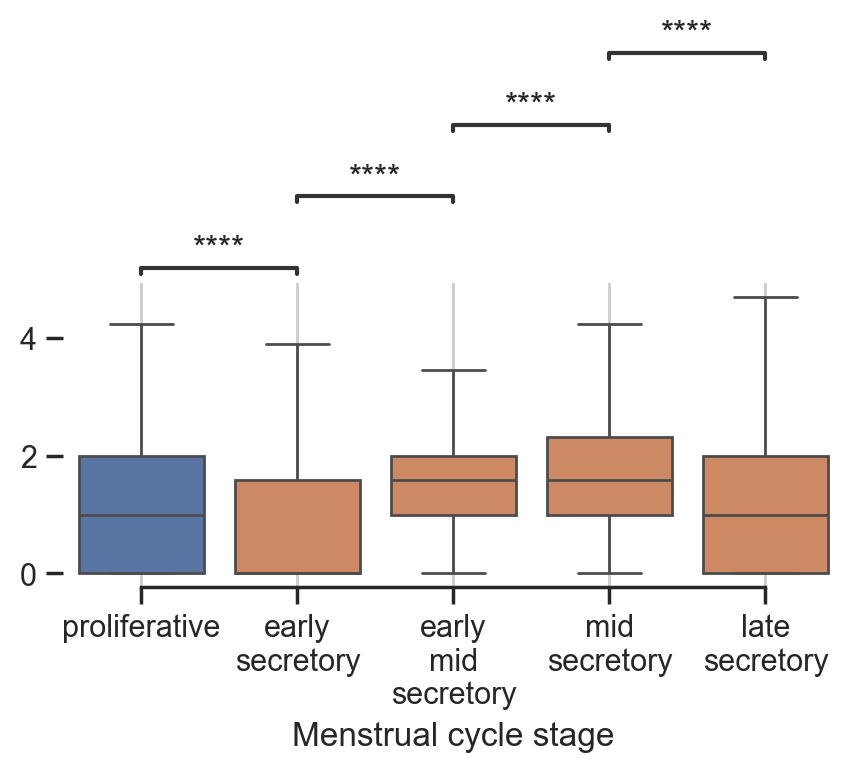

In [46]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(5, 2))

sns.boxplot(x='Stage spaced',
            y='TENT5A',
            hue='Binary Stage',
            showfliers=False,
            data=glandular_tent_df,
            legend=False,)

pairs = list(pairwise(spaced_menstrual_cycle))

annotator = Annotator(ax,
                      pairs,
                      data=glandular_tent_df,
                      y='TENT5A',
                      x='Stage spaced',
                      orientation='horizontal')

annotator.configure(test='Mann-Whitney',
                    text_format='star',
                    loc='outside',
                    comparisons_correction='fdr_bh',
                    line_offset=0,
                    line_offset_to_group=0)

annotator.apply_and_annotate()


ax.xaxis.grid(True)
plt.xlabel('Menstrual cycle stage')
ax.set(ylabel='')
sns.despine(trim=True, left=True)

fig.savefig('figures/glandular_box.png',
            dpi=300,
            bbox_inches='tight')

## Lumenal cells

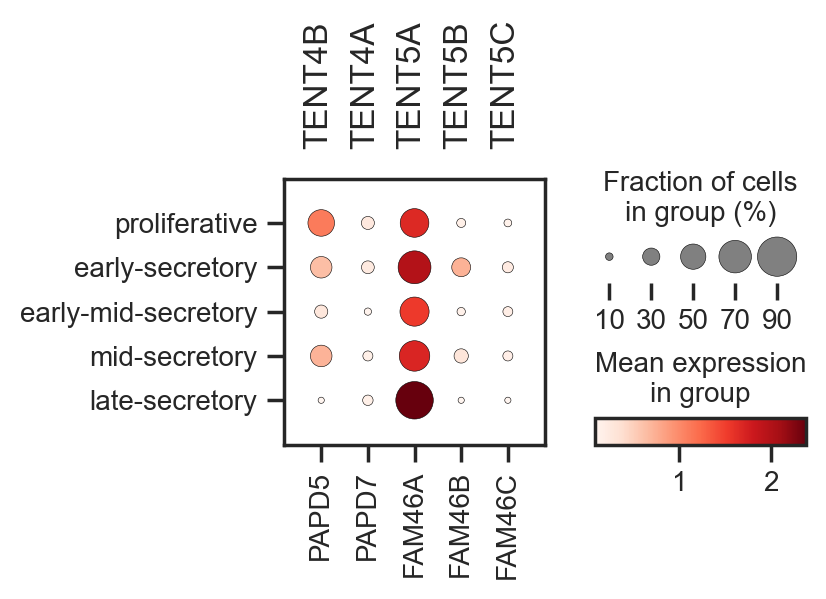

In [25]:
lumenal = epithelial[epithelial.obs['Cell type'] == 'Lumenal']
sc.pl.dotplot(lumenal,
              var_names=tent_map, groupby='Stage',
              categories_order=menstrual_cycle)

Some cycle-reated pattern in TENTB. Maybe worth considering.

## SOX9 cells

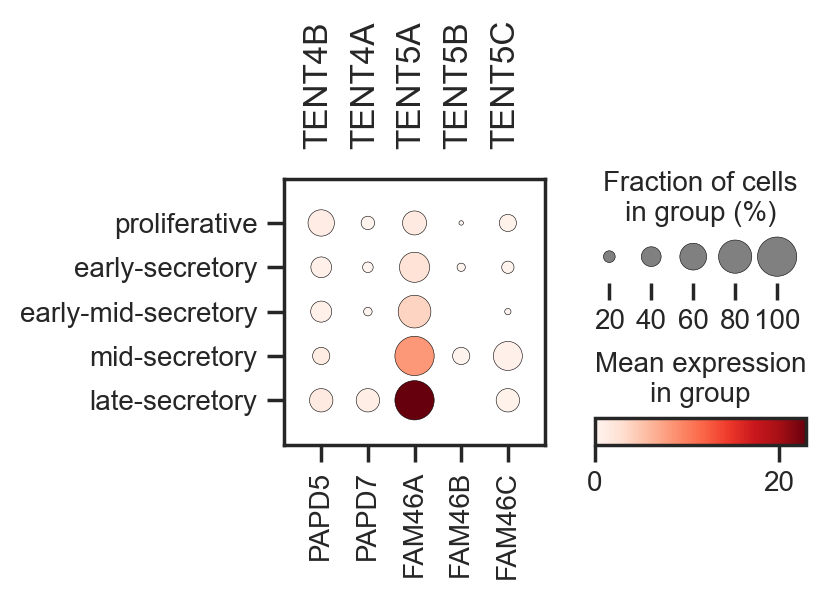

In [41]:
sox = epithelial[epithelial.obs['Cell type'] == 'SOX9']
sc.pl.dotplot(sox,
              var_names=tent_map, groupby='Stage',
              categories_order=menstrual_cycle,
              save='_sox.png')

Interesting and strong cycle-related pattern. Definitely worth further consideration. 

In [27]:
sox_to_compare = []

for condition in menstrual_cycle:
    expr = sox[sox.obs['Stage'] == condition].obs_vector('FAM46A')
    sox_to_compare.append(expr)

stat, p = stats.kruskal(*sox_to_compare)
print(p)

1.247521957844807e-31


In [28]:
sox_tent_df = pd.DataFrame({'TENT5A': sox.obs_vector('FAM46A'),
                            'Stage spaced': sox.obs['Stage spaced'].values,
                            'Binary Stage': sox.obs['Binary Stage'].values})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

proliferative vs. early
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.381e-32 U_stat=1.131e+06
proliferative vs. early
mid
secretory: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.256e-03 U_stat=1.837e+04


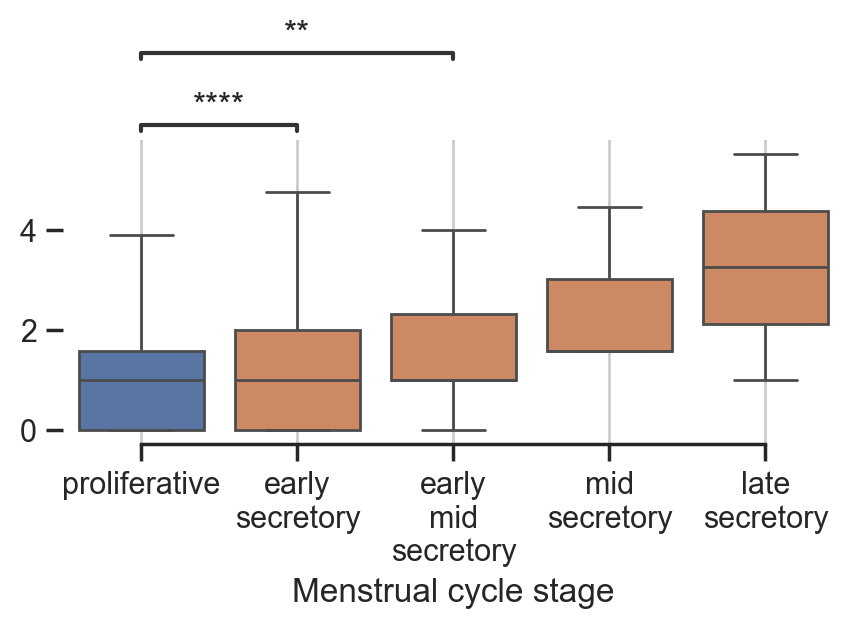

In [43]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(5, 2))

sns.boxplot(x='Stage spaced',
            y='TENT5A',
            hue='Binary Stage',
            showfliers=False,
            data=sox_tent_df,
            legend=False)

pairs = list(combinations(spaced_menstrual_cycle, 2))

annotator = Annotator(ax,
                      pairs,
                      data=sox_tent_df,
                      y='TENT5A',
                      x='Stage spaced',
                      orientation='horizontal')

annotator.configure(test='Mann-Whitney',
                    text_format='star',
                    loc='outside',
                    comparisons_correction='fdr_bh',
                    hide_non_significant=True,
                    line_offset=0,
                    line_offset_to_group=0)

annotator.apply_and_annotate()

ax.xaxis.grid(True)
ax.set(ylabel='')
plt.xlabel('Menstrual cycle stage')
sns.despine(trim=True, left=True)

fig.savefig('figures/sox_box.png',
            dpi=300,
            bbox_inches='tight')